[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Humboldt-WI/adams/blob/master/exercises/tut10_Attention_teacher.ipynb)

# Attention and transformers

In this exercise you will apply a transformer model to the task of sentiment classification. We highlight two very important properties of transformer models.
* self-attention: this mechanism enables the models to capture the context of each word within an incoming text.
* positional encoding: Just like RNN's, transformers process sequence data, but instead of using hidden states to capture the ordering of words, transformers use positional embeddings.

The first part of the exercise is meant to give an intuition of the self-attention principle. In addition to solving the exercise, you can watch the video https://www.youtube.com/watch?v=g2BRIuln4uc, which illustrates the idea of attention very clearly. Positional encodings are a rather abstract topic and will not be handled in this exercise. However, the video https://www.youtube.com/watch?v=1biZfFLPRSY offers a simple and understandable illustration of this topic.
 
In the second part of the tutorial you need to apply a BERT (Bidirectional Encoder Representations from Transformers) model, which belongs to the family of transformer models.  



In [ ]:
## required libraries
import numpy as np
import pandas as pd
from scipy.special import softmax
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## definition of the vocabulary
voc = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'other', 'bank', 'drove', 'road']

In [ ]:
## artificial two dimensional embeddings
emb = pd.DataFrame([[1, 1], [2, 2], [1.2, 1.2], [0.9,0.9], [1.9,1.9], [0.8,0.8], [0.85,0.85], [0.95,0.95], [0,2],[2,-2],[2,-1.9]])

(11, 2)

### Exercise 1
In this exercise we want to generate contextualized embeddings. Let $[v_{1},...,v_{n}]$ be a sentence were $v_{i}$ is the (non-contextualized) embedding of token $i$. A contextualized embedding $y_{i}$ of word $i$ is the weighted sum of the (non-contextualized) embeddings of the tokens in that sentence $y_{i}=\sum_{j=1}^{n} w_{ij}v_{j}$. The $w_{ij}$ are the attention weights, which measure the importance of token $j$ for the context of token $i$.

a) Your first exercise is to calculate the attention weights for each token in the sentence "I swam across the river, to get to the other bank." The weights should be stored in a matrix \begin{bmatrix}
w_{11} & ... & w_{1n}\\
\vdots & \vdots & \vdots \\
w_{n1} & ... & w_{nn}
\end{bmatrix} Below, we provide a function to calculate the weights.

In [ ]:
## function to calculate the attention weights
def attention_weights(token, sent):
  
  ## get indices of tokens
  idx_token = [idx for idx, element in enumerate(voc) if element == token][0]
  idx_sentence = []
  for i in range(0, len(sent)):
    idx_sentence.append([idx for idx, element in enumerate(voc) if element == sent[i]][0])

  ## calculate weights for token
  weights = softmax([np.dot(emb.iloc[idx_token],emb.iloc[i]) for i in idx_sentence])
  
  ## return
  return weights

In [ ]:
## calculation of the weights
sent_water = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'to', 'the', 'other', 'bank']
sent_weights = []
for i_token in range(0, len(sent_water)):
  sent_weights.append(attention_weights(sent_water[i_token], sent_water))

## print results
print(pd.DataFrame(sent_weights))

          0         1         2         3         4         5         6   \
0   0.046394  0.342811  0.069212  0.037985  0.280670  0.031099  0.034370   
1   0.010098  0.551336  0.022474  0.006769  0.369572  0.004537  0.005542   
2   0.036094  0.397865  0.058330  0.028392  0.312972  0.022334  0.025182   
3   0.051869  0.313790  0.074346  0.043325  0.262100  0.036188  0.039596   
4   0.012033  0.537892  0.025730  0.008229  0.367843  0.005627  0.006805   
5   0.057415  0.284376  0.079067  0.048925  0.242329  0.041692  0.045164   
6   0.054641  0.299100  0.076767  0.046098  0.252340  0.038892  0.042342   
7   0.057415  0.284376  0.079067  0.048925  0.242329  0.041692  0.045164   
8   0.051869  0.313790  0.074346  0.043325  0.262100  0.036188  0.039596   
9   0.049116  0.328381  0.071821  0.040617  0.271558  0.033588  0.036936   
10  0.035787  0.264430  0.053387  0.029300  0.216497  0.023989  0.026511   

          7         8         9         10  
0   0.031099  0.037985  0.041979  0.046394

b) Plot a heat map of the weights, using sns.heatmap. 

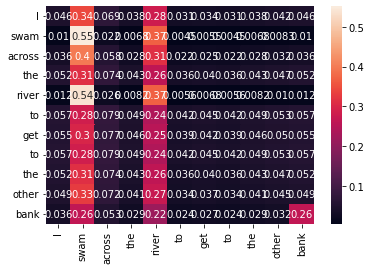

In [ ]:
sns.heatmap(pd.DataFrame(sent_weights, columns=sent_water, index = sent_water), annot=True)

c) Calculate the contextualized embedding of the word "bank" in the two sentences "I swam across the river, to get to the other bank." and "I drove across the road, to get to the other bank". You can do this by multiplying the transposed embedding matrix $E'=\begin{bmatrix}
v_{1} & ... & v_{n}\\
\end{bmatrix}$ with the vector $\begin{bmatrix}
w_{i1} & ... & w_{in}\\
\end{bmatrix}$, of the weights of "bank".  

In [ ]:
sent_water = ['I', 'swam', 'across', 'the', 'river', 'to', 'get', 'to', 'the', 'other', 'bank']
sent_road = ['I', 'drove', 'across', 'the', 'road', 'to', 'get', 'to', 'the', 'other', 'bank']
weights_bank_water = attention_weights('bank', sent_water)
weights_bank_road = attention_weights('bank', sent_road)
print(weights_bank_water)

[0.0357867  0.26442994 0.05338748 0.02929967 0.21649692 0.02398854
 0.02651144 0.02398854 0.02929967 0.03238115 0.26442994]


In [ ]:
emb_bank_water = emb.transpose().dot(weights_bank_water) 
emb_bank_road = emb.transpose().dot(weights_bank_road)
print(emb_bank_water)
print(emb_bank_road)

0    1.724562
1    0.622360
dtype: float64
0    1.511239
1   -0.611359
dtype: float64


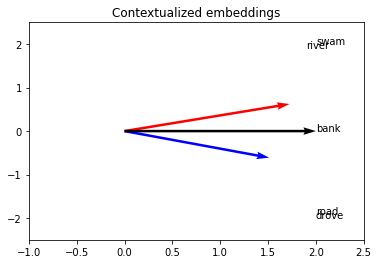

In [ ]:
## Plot contextual embeddings
origin = np.array([[0, 0, 0],[0, 0, 0]]) # origin point
plt.quiver(*origin, [emb_bank_water[0], emb_bank_road[0], 2], [emb_bank_water[1], emb_bank_road[1], 0], 
           angles='xy', scale_units='xy', scale=1, color=['r','b', 'black'])
plt.annotate("bank", (2, 0))
plt.annotate("swam", (2, 2))
plt.annotate("river", (1.9, 1.9))
plt.annotate("drove", (2, -2))
plt.annotate("road", (2, -1.9))
plt.xlim(-1, 2.5)
plt.ylim(-2.5, 2.5)
plt.title('Contextualized embeddings')
plt.show()

d) Now, you generated contextualized embeddings in a very simple way by calculating scalar products between the un-contextualized embeddings $s_{ij}=\langle\,v_{i},v_{j}\rangle$, calculating weights by softmax $w_{ij}=\frac{e^{s_{ij}}}{\sum_{j}e^{s_{ij}}}$ and building a weighted sum of the un-contextualized embeddings $y_{i}=\sum_{j}w_{ij}v_{j}$. Does it make sense to integrate this transformation procedure for the embeddings into a machine learning model or is there a way we could modify this procedure, such that it makes more sense?  

### Answer
The above procedure is deterministic, so there is nothing to learn for a machine learning model. We could add three weight matrices $M_{q}$ (queries), $M_{k}$ (keys), $M_{v}$ (values) to the process. The scalar products then become $s_{ij}=\langle\,M_{q}v_{i},M_{k}v_{j}\rangle$ and the weighted sum of embeddings becomes $y_{i}=\sum_{j}w_{ij}M_{v}v_{j}$. The weights of these matrices can be learned within a machine learning model.

## Exercise 2 (demonstration of BERT model use)
In this exericise you will use a pre-trained BERT model. You will load the model and than do some fine tuning on the model weights. We recommend to do the exercise in Google Colab because we faced some errors when loading the transformer packages on our own environment. The exercise follows the original tuturial [TF-Tutorial](https://www.tensorflow.org/text/tutorials/classify_text_with_bert). 

The archtecture of BERT models is realy complicated and will not be treated in detail here. We recommend the following tutorial, which gives an excellent illustrationof transformer models [Tut. transformer](http://jalammar.github.io/illustrated-transformer/).   

### Install transformers
Unlike many other libraries, Colab does not have the transformers package pre-installed. You will have to install it every time that you start Colab again. This is the package where you will find most of the critical tools for BERT including the pre-trained models and tokenizer.

In [ ]:
!pip install -q -U "tensorflow-text==2.8.*"

     |████████████████████████████████| 4.9 MB 5.4 MB/s 


In [ ]:
!pip install -q tf-models-official==2.7.0

     |████████████████████████████████| 1.8 MB 5.0 MB/s 
     |████████████████████████████████| 92 kB 13.3 MB/s 
     |████████████████████████████████| 1.1 MB 61.0 MB/s 
     |████████████████████████████████| 1.2 MB 54.6 MB/s 
     |████████████████████████████████| 237 kB 13.8 MB/s 
     |████████████████████████████████| 99 kB 8.7 MB/s 
     |████████████████████████████████| 43 kB 1.6 MB/s 
     |████████████████████████████████| 596 kB 49.3 MB/s 
     |████████████████████████████████| 48.3 MB 141 kB/s 
     |████████████████████████████████| 352 kB 55.6 MB/s 


### Import libraries
Now that you have the transfomers library on hand, it will be necessary to import it and the rest of the libraries that you will need in the task. Here we will need tensorflow, pandas, OS and shutil for basic tasks and also specific parts of the transformers package for BERT.

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub # for BERT models
import tensorflow_text as text
from official.nlp import optimization  # for AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

### Load and set up the dataset

In this task, we will be using the IMDB reviews dataset. Unlike in the previous exercises, we download the data and store it in a directory.

In [ ]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

df = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

df_dir = os.path.join(os.path.dirname(df), 'aclImdb')
X_train_dir = os.path.join(df_dir, 'train')
X_test_dir = os.path.join(df_dir, 'test')

# we only need labeled data (data for supervised learning), so we can remove the unsupervised folder
remove_dir = os.path.join(X_train_dir, 'unsup')
shutil.rmtree(remove_dir)

84140032/84125825 [==============================] - 3s 0us/step


BERT is going to take up a lot of processing power. It is highly advisable to organize your data into batches so that the amount of data that you are working with is manageable. For now, we will set the size of the batches of data that we will take to 32. You can experiment with this number when working with the program for later tasks.

In [ ]:
batch_size = 32


Note that the function [prefetch](https://www.tensorflow.org/guide/data_performance#prefetching) is just used to prepare the data as the machine would expect to receive it. It is normally used to make sure that the next batch of data is ready for use.

In [ ]:
# set seed for reproducibility in train-test split
seed = 888

# Create the pre-processing train df and create a seperate subset training only
X_train_raw = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='training',
    seed=seed)

X_train = X_train_raw.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
# Note: AUTOTUNE tracks the time spent in each operation, these times can be fed into the optimization algorithm

# Take the validation data subset for processing
X_val = tf.keras.preprocessing.text_dataset_from_directory(
    X_train_dir,
    batch_size=batch_size,
    validation_split=0.2,
    subset='validation',
    seed=seed)

X_val = X_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

# Prepare the test data for processing
X_test = tf.keras.preprocessing.text_dataset_from_directory(
    X_test_dir,
    batch_size=batch_size)

X_test = X_test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.
Found 25000 files belonging to 2 classes.


### Load a BERT model

You can explore a [large list of versions of BERT here](https://huggingface.co/models). These pretrained versions of BERT differ mainly in size and/or the topics of text. Using specific versions of BERT can sometimes help with the performance of your model, though this is not always the case. It is a very good idea to test several versions of BERT for your purposes to see which one is optimal for your situation. For our purposes, we will use a small uncased BERT. Here, uncased means that BERT will ignore capitalization and small means that BERT will only take shorter inputs. 

As the BERT model we chose needs input of a specific format, we also need to load a customized pre-processor, which converts the text in exactly the right format. 

In [ ]:
## load the preprocessor
bert_preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')

## load the BERT model
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1')
#example_bert_results = bert_model(example_preprocessed)

Now, we have a look how the preprocessor works. For this purpose we define an example sentence and then examine the preprocessed sentence.


In [ ]:
example_text = ['hated every minute of it.']
example_preprocessed = bert_preprocessor(example_text)

print(f'Shape of input_word_ids: {example_preprocessed["input_word_ids"].shape}')
print(f'First 12 input_word_ids: {example_preprocessed["input_word_ids"][0, :12]}')


Shape of input_word_ids: (1, 128)
First 12 input_word_ids: [ 101 6283 2296 3371 1997 2009 1012  102    0    0    0    0]


First, we note that input sequences for our BERT model need a sequence length of 128. This can be achieved by truncation and padding. We can see that all the words in the example sentence are converted to ID's in the vocabulary. This shows that BERT has already encountered most words that will be important for classification through its pre-training. 

Was the number of non-zero tokens what you expected? You may have only anticipated the following tokens: 'hated', 'every', 'minute', 'of', 'it', '.'. Why do we have an extra 2 tokens? BERT automatically adds tokens to indicate the beginning and end of a sentence as well. The rest of the sequence will be 0s as padding to keep the input length the same which is necessary for mathematical convenience.

### Build the classifier
Now we will stack some layers to create a classifier model. We will use:
- an input layer which receives the raw text
- a layer to preprocess the text for the BERT encoder
- an encoding layer which returns BERT outputs
- a dropout layer to prevent overfitting
- a final dense layer for the final classification

In [ ]:
def build_classifier_model():
  # create input layer
  input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input text')
  # add preprocessing layer and input text
  preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessor(input_layer)
  # add encoding layer and feed preprocessed text into layer
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  # take the pooled output and apply a dropout layer to it to prevent overfitting
  pooled = outputs['pooled_output']
  pooled = tf.keras.layers.Dropout(0.1)(pooled)
  # create output layer which is the final classifier
  pooled = tf.keras.layers.Dense(1, activation=None, name='classifier')(pooled)
  return tf.keras.Model(input_layer, pooled) 

In [ ]:
## instantiate model
classifier_model = build_classifier_model()

## check architecture
classifier_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input text (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_mask': (Non  0           ['input text[0][0]']             
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_word_ids':                                                
                                (None, 128)}                                                  

### Setting up loss metric and meta parameters

BERT usually gets trained for less epochs than traditional deep learning models. Depending on your task and system abilities, you can of course experiment with adding more epochs to see how it affects the model's performance. Here we set the number of epochs especially low, to get quick results during the tutorial.

`steps_per_epoch` is the total number of steps (batches of observations) to yield from generator before declaring one epoch finished and starting the next epoch. We will set his equal to the cardinality (the unique items per column) as recommended by tensorflow.

We will keep our learning rate at the highest level for the first 10% of training steps then it will follow a linear decay. According to the paper on BERT, you can also try learning rates of 5e-5 and 2e-5 if you'd like to experiment, but these seem to be best for fine-tuning BERT.

Lastly, for an optimizer, AdamW will be used, which is Adaptive Movements with weight decay (instead of regular Adam which is based on moments).

In [ ]:
## loss
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

## meta parameters
epochs = 1
steps_per_epoch = tf.data.experimental.cardinality(X_train).numpy()
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5 # Best options for BERT: 5e-5, 3e-5, 2e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

Now that we have all of these set, we can compile the model with them.

In [ ]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

### Fit and evaluate model 


In [ ]:
## fit model
history = classifier_model.fit(x=X_train,
                               validation_data=X_val,
                               epochs=epochs)

625/625 [==============================] - 169s 256ms/step - loss: 0.4475 - binary_accuracy: 0.7763 - val_loss: 0.3939 - val_binary_accuracy: 0.8262


In [ ]:
## evaluate model
loss_res, acc_res = classifier_model.evaluate(X_test)

print(f'Loss: {loss_res}')
print(f'Accuracy: {acc_res}')

782/782 [==============================] - 90s 115ms/step - loss: 0.3710 - binary_accuracy: 0.8323
Loss: 0.37099120020866394
Accuracy: 0.832319974899292


## Exercise 3
Now you have loaded a pre-trained BERT model and fine-tuned its parameters. Which parameters of the model did you modify during training compared to the pre-trained model? Load the same pre-trained model again and only train the parameters of the dense layer. Which differences do you notice? 

In [ ]:
def build_classifier_model_train_dense_layer():
  # create input layer
  input_layer = tf.keras.layers.Input(shape=(), dtype=tf.string, name='input text')
  # add preprocessing layer and input text
  preprocessor = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3', name='preprocessing')
  encoder_inputs = preprocessor(input_layer)
  # add encoding layer and feed preprocessed text into layer
  encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1', trainable=False, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  # take the pooled output and apply a dropout layer to it to prevent overfitting
  pooled = outputs['pooled_output']
  pooled = tf.keras.layers.Dropout(0.1)(pooled)
  # create output layer which is the final classifier
  pooled = tf.keras.layers.Dense(1, activation=None, name='classifier')(pooled)
  return tf.keras.Model(input_layer, pooled) 

classifier_model_train_dense_layer = build_classifier_model_train_dense_layer()

In [ ]:
## check architecture
classifier_model_train_dense_layer.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input text (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 preprocessing (KerasLayer)     {'input_word_ids':   0           ['input text[0][0]']             
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [ ]:
## compile and fit model
classifier_model_train_dense_layer.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

history_train_dense_layer = classifier_model_train_dense_layer.fit(x=X_train,
                               validation_data=X_val,
                               epochs=1)

625/625 [==============================] - 91s 140ms/step - loss: 0.7827 - binary_accuracy: 0.6985 - val_loss: 0.7745 - val_binary_accuracy: 0.5202


In [ ]:
## evaluate model
loss_res, acc_res = classifier_model_train_dense_layer.evaluate(X_test)

print(f'Loss: {loss_res}')
print(f'Accuracy: {acc_res}')

782/782 [==============================] - 88s 113ms/step - loss: 0.7747 - binary_accuracy: 0.5248
Loss: 0.7747092247009277
Accuracy: 0.5248399972915649


Check for further details on transfer learning and fine-tuning with Keras [here](https://keras.io/guides/transfer_learning/).